# 示範指令使用

### 用指令算 3gram 

In [1]:
!egrep -o '([^ ]+ ){2}[^ ]+' VOA.txt | tr 'A-Z' 'a-z' | \
sort -r  | uniq -c | awk '{if ($1 > 1) printf "%s %s %s\t%s\n",$2,$3,$4,$1 }' | \
head -20

zurich protested the	2
zuhir al-naimi ,	3
zuhayr talib abd	4
zubaidi does not	2
zoran zivkovic said	2
zoran zivkovic ,	2
zoran djindjic has	2
zoran djindjic .	10
zora neale hurston	8
zones over northern	2
zone that divides	2
zone monday attacked	2
zone in the	3
zone between north	3
zone along the	2
zone about 370	2
zone , where	2
zoellick formalized the	2
zivkovic possible candidacy	2
zimbabwean president robert	2
awk: write error on stdout
 input record number 6909, file 
 source line number 1
uniq: write error: Broken pipe


### 縮小檔案基本方法
- `wc -l file` 算行數
- `head -# file > new_file`  取前 # 行
- `head -c #m > new_file` 取前 #mb 資料

-----

# Lab3開始

# word tokenize
- 使用 nltk, pattern 或 textblob 做 word tokenize。這邊統一使用 nltk 的 wordpunct_tokenize 切字。
- 資料取原始檔案的前 50000 行

# 計算 skip bigram 

- $p_j^i$ 
- ngram 任何位置不包含符號
- skip bigram 不包含 stop words 與數字

In [1]:
from __future__ import division

k0 = 1
k1 = 1
U0 = 10
max_distance = 5

In [ ]:
# 示範 code ，修改下列 code 達到目的
# 可跳過 ngram ，直接計算 skip bigram
from nltk.tokenize import  wordpunct_tokenize 
from nltk.corpus import stopwords 
eng_stopwords = set(stopwords.words('english'))
eng_symbols = '{}"\'()[].,:;+!?-*/&|<>=~$'
def ngram_is_valid(ngram):
    first, last = ngram[0], ngram[-1]
    if first in eng_stopwords or last in eng_stopwords: return False
    if any( num in first or num in last for num in '0123456789'): return False
    if any( eng_symbol in word for word in ngram for eng_symbol in eng_symbols): return False
    return True

from collections import defaultdict, Counter
def to_ngrams( unigrams, length):
    return zip(*[unigrams[i:] for i in range(length)])  

from nltk.tokenize import  wordpunct_tokenize 
ngram_counts = defaultdict(Counter)
with open('citeseerx_descriptions_sents.txt.50000') as text_file:
    for index,line in enumerate(text_file): 
        words = wordpunct_tokenize(line)
        for n in range(2, max_distance + 2):
            ngram_counts[n].update(filter(ngram_is_valid, to_ngrams(words, n)))

*your code here*

---

### 階段檢查資料


In [61]:
skip_bigram_info['role'].items()[:10]

[('limited', Counter({3: 1})),
 ('concept', Counter({1: 1, -5: 1, 4: 1, -2: 1})),
 ('semantic', Counter({2: 1, -1: 1})),
 ('consider', Counter({5: 1})),
 ('graphics', Counter({3: 1})),
 ('focus', Counter({-5: 1, -4: 1})),
 ('Does', Counter({-2: 1})),
 ('computation', Counter({2: 1})),
 ('reasoning', Counter({-4: 1})),
 ('issues', Counter({3: 1, -5: 1}))]

In [60]:
skip_bigram_info['play']['role']

Counter({3: 51, 2: 8, 4: 5, -4: 2, -2: 2, 5: 1, -5: 1})

# 計算 skip bigram 的各種統計資訊 
$freq,\ \bar{f},\ \sigma,\ u_i,\ \bar{p_i}$

*your code here*

---

### 階段檢查資料
- $\bar{f}$ : `avg_freq`
- $\sigma$ : `dev`
- $u_i$ : `spread`
- $freq$ : `freq`


In [86]:
print skip_bigram_info["play"]["role"]
print skip_bigram_abc[('play','avg_freq')]
print skip_bigram_abc[('play','dev')]
print skip_bigram_abc[('play','role','spread')]
print skip_bigram_abc[('play','role','freq')]

Counter({3: 51, 2: 8, 4: 5, -4: 2, -2: 2, 5: 1, -5: 1})
1.52475247525
4.1971089989
221.0
70.0


## 使用 pandas 畫出 play role 的各距離數量 

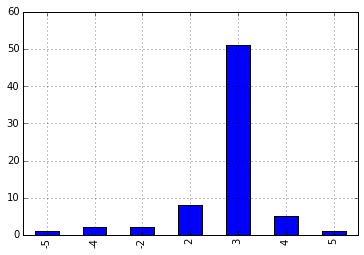

In [87]:
import pandas 
%matplotlib inline
play_role_distances_count = pandas.Series(skip_bigram_info['play']['role'].values(), index= skip_bigram_info['play']['role'].keys()).sort_index()
play_role_distances_count.plot(kind='bar')

# 依據 Smadja’s 三個規則篩選 skip bigrams

$$\begin{cases} 
strength = \frac{freq - \bar{f}}{\sigma} \ge k_0 & (C_1)\\
spread \ge u_0 & (C_2) \\
p_j^i \ge \bar{p_i} + (k_1 \times \sqrt{u_i}) & (C_3) 
\end{cases}$$

*your code here*

---

## 使用 pandas Dataframe 整理與顯示資料

In [75]:
# cc = [('base word', 'collocate', 'distance', 'strength', 'spread', 'peak', 'p').......]
import pandas
collocations_df = pandas.DataFrame(cc,
                                   columns = ['base word', 'collocate', 'distance', 'strength', 'spread', 'peak', 'p'])
collocations_df = collocations_df.set_index(['base word', 'collocate', 'distance']).sort_index()

### 列出 collocation Dataframe

In [76]:
collocations_df

strength    spread        peak    p
base word collocate distance                                      
#         #         -2        37.990803    506.56   87.706888  107
                     2        37.990803    506.56   87.706888  107
          The       -3         2.035968     13.16    7.427671   10
                    -2         2.035968     13.16    7.427671    8
          We        -5         1.333268     20.04    7.076606    8
                    -4         1.333268     20.04    7.076606   14
          c          1         2.153085    114.20   14.686440   36
          ciency     1         2.738668    178.60   18.364131   45
          cient      1         8.828738   2043.44   60.604425  151
          ciently    1         2.153085    128.60   15.340194   38
          coe       -1         1.216151     43.04    8.960488   22
          cult       1         1.860293    103.45   13.671037   34
          di        -1        20.716086   9893.61  135.166628  334
          e         -1        24.053912  11877.84  150.385504  368
          ect        1         2.035968    115.36   14.540577   36
          ective     1         3.148577    270.21   22.138066   55
          ectively   1         1.157593     47.61    9.200000   23
          ects       1         1.977410    109.21   14.150359   35
          er         1         1.860293     96.85   13.341240   33
          erent      1        12.459357   3617.24   81.743495  202
          erential   1         1.450384     59.96   10.543384   26
          ers        1         1.450384     59.96   10.543384   26
          n         -1         2.504435     24.44    9.543683   16
                     1         2.504435     24.44    9.543683   12
          o         -1         4.026952    384.56   26.810201   66
          su        -1         2.855785    223.16   20.138541   50
          tra       -1         1.743176     85.61   12.552567   31
          two       -2         1.801735     15.84    7.379950   13
                     3         1.801735     15.84    7.379950    8
          usion      1         1.099034     43.56    8.800000   22
...                                 ...       ...         ...  ...
work      done       1         4.073897     15.44    6.529377    8
                     3         4.073897     15.44    6.529377   11
          earlier   -1         2.350643     17.24    5.752108   14
          future    -1         4.246222     41.81    9.166065   22
          main      -4         2.005992     12.64    4.955278   12
          paper     -4         6.486453     28.20    9.310367   13
                    -3         6.486453     28.20    9.310367   15
          present   -2         4.418548     11.56    6.200000    7
                    -1         4.418548     11.56    6.200000   11
          previous  -1        13.551795    469.09   29.758486   73
          progress   2         2.005992     12.64    4.955278   12
          recent    -1         4.246222     60.41   10.472387   26
          well       1         1.833666     10.61    4.557299   11
works     previous  -1         9.569996     14.84    5.452272   13
world     data       1         5.345151     12.21    5.194281   12
          real      -1        22.807470    390.81   26.468915   66
          virtual   -1         3.948165     10.61    4.557299   11
worst     case       1        11.213565     43.21    8.873431   22
would     allow      1         6.998167     10.76    4.480244   11
          like       1        14.299831     31.81    7.940035   19
x         #         -1        10.066947     52.41   11.939475   12
                     1        10.066947     52.41   11.939475   24
years     In        -2         8.225192     84.60   13.197826   31
          ago        1         1.962656     10.89    4.400000   11
          last      -2         8.009242     73.29   12.460958   28
          many      -1         3.042404     20.04    6.076606   15
          past      -2         8.441141    107.49   14.467738   35
          r

### 依據 strength 排序 collocation

In [77]:
collocations_df.sort(columns = 'strength', ascending=False)[:10]

strength     spread        peak     p
base word collocate distance                                        
This      paper      1        48.541987  342586.69  782.409055  1953
also      We        -1        43.152065   13829.36  159.398299   394
In        paper      2        39.973864  288595.41  720.910769  1795
#         #          2        37.990803     506.56   87.706888   107
                    -2        37.990803     506.56   87.706888   107
present   We        -1        37.248306   43512.69  284.696956   700
order     In        -1        36.934238    3010.44   73.267477   183
show      We        -1        36.319055   13484.29  167.221876   388
paper     This      -1        35.956122  342586.69  782.409055  1953
The       paper      1        35.098383    7977.44  138.716516   295

### collocation Dataframe 的各欄位統計數據

In [78]:
collocations_df.describe()

,strength,spread,peak,p
count,5586.000000,5586.000000,5586.000000,5586.000000
mean,7.707662,385.646523,11.889527,24.897601
std,5.059240,8558.524301,24.439706,60.029804
min,1.011534,10.000000,4.400000,5.000000
25%,3.875712,14.050000,5.800000,12.000000
50%,6.715695,23.040000,7.564878,15.000000
75%,10.315979,51.840000,11.200000,23.000000
max,48.541987,342586.690000,782.409055,1953.000000


### role 的相關 collocations

In [79]:
collocations_df.loc['role']

,,strength,spread,peak,p
collocate,distance,,,,
The,-1,5.058224,19.49,6.314748,15
central,-1,3.306837,10.61,4.557299,11
important,-1,11.771874,134.96,15.817229,39
play,-3,19.945013,221.00,21.866069,51
plays,-3,7.393407,34.01,8.531809,20


### strength 的數據分佈

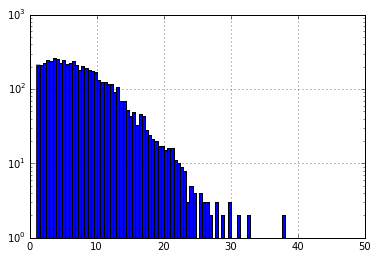

In [80]:
collocations_df.strength.hist(bins=100, log=True)

### 複雜篩選處理示範

In [81]:
collocations_df[ collocations_df.index.map(lambda x: x[2] == 1) & (collocations_df.spread > 800)  & (collocations_df.peak > 1000)
                ].sort(columns='strength', ascending=False)[:20]

,,,strength,spread,peak,p
base word,collocate,distance,,,,


# BONUS!!!
使用 `citeseerx100000.tag.txt` 找出 VN 關係的 collocations